<a href="https://colab.research.google.com/github/llong2195/ML/blob/main/ML_rain_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# thêm các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# đọc file csv trên drive
df = pd.read_csv(r'/content/drive/MyDrive/EPU/weatherAUS.csv')
df.columns=df.columns.str.strip().str.lower()
df.columns
df = df.drop(['date', 'location'],axis =1)

In [ ]:
print('shape :' ,df.shape)
df.head()

shape : (145460, 21)


,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   mintemp        143975 non-null  float64
 1   maxtemp        144199 non-null  float64
 2   rainfall       142199 non-null  float64
 3   evaporation    82670 non-null   float64
 4   sunshine       75625 non-null   float64
 5   windgustdir    135134 non-null  object 
 6   windgustspeed  135197 non-null  float64
 7   winddir9am     134894 non-null  object 
 8   winddir3pm     141232 non-null  object 
 9   windspeed9am   143693 non-null  float64
 10  windspeed3pm   142398 non-null  float64
 11  humidity9am    142806 non-null  float64
 12  humidity3pm    140953 non-null  float64
 13  pressure9am    130395 non-null  float64
 14  pressure3pm    130432 non-null  float64
 15  cloud9am       89572 non-null   float64
 16  cloud3pm       86102 non-null   float64
 17  temp9am        143693 non-nul

In [ ]:
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.nunique()

mintemp          389
maxtemp          505
rainfall         681
evaporation      358
sunshine         145
windgustdir       16
windgustspeed     67
winddir9am        16
winddir3pm        16
windspeed9am      43
windspeed3pm      44
humidity9am      101
humidity3pm      101
pressure9am      546
pressure3pm      549
cloud9am          10
cloud3pm          10
temp9am          441
temp3pm          502
raintoday          2
raintomorrow       2
dtype: int64

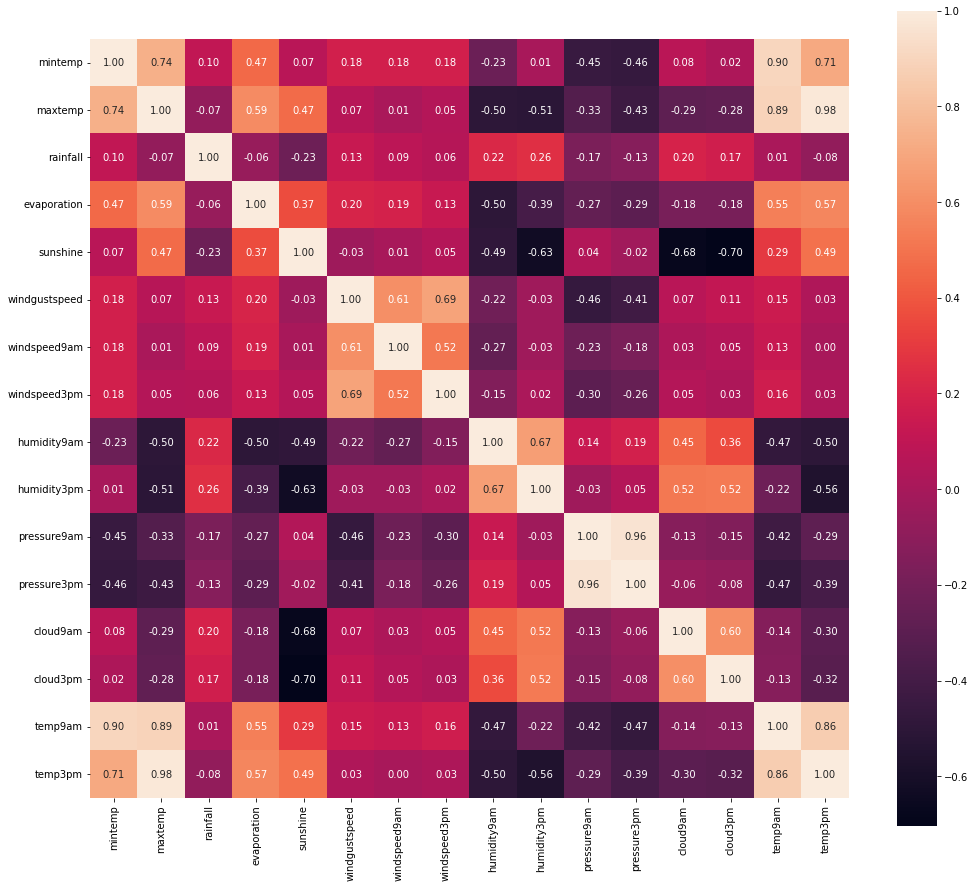

In [ ]:
# 
plt.figure(figsize=(17,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [ ]:
#Hiển thị dữ liệu thiếu và tính %
checkMissingData = pd.DataFrame(df.isnull().sum(),columns = ['missing'])

checkMissingData['% missing']= (checkMissingData/len(df)).round(2)*100
checkMissingData

,missing,% missing
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0
windspeed9am,1767,1.0


In [ ]:
# drop dữ liệu thiếu > 35%
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [ ]:
# khắc phục dữ liệu thiếu -> 
df['mintemp']=df['mintemp'].fillna(df['mintemp'].mean())
df['maxtemp']=df['maxtemp'].fillna(df['maxtemp'].mean())
df['rainfall']=df['rainfall'].fillna(df['rainfall'].mean())
# df['evaporation']=df['evaporation'].fillna(df['evaporation'].mean())
# df['sunshine']=df['sunshine'].fillna(df['sunshine'].mean())
df['windgustspeed']=df['windgustspeed'].fillna(df['windgustspeed'].mean())
df['windspeed9am']=df['windspeed9am'].fillna(df['windspeed9am'].mean())
df['windspeed3pm']=df['windspeed3pm'].fillna(df['windspeed3pm'].mean())
df['humidity9am']=df['humidity9am'].fillna(df['humidity9am'].mean())
df['humidity3pm']=df['humidity3pm'].fillna(df['humidity3pm'].mean())
df['pressure9am']=df['pressure9am'].fillna(df['pressure9am'].mean())
df['pressure3pm']=df['pressure3pm'].fillna(df['pressure3pm'].mean())
# df['cloud9am']=df['cloud9am'].fillna(df['cloud9am'].mean())
# df['cloud3pm']=df['cloud3pm'].fillna(df['cloud3pm'].mean())
df['temp9am']=df['temp9am'].fillna(df['temp9am'].mean())
df['temp3pm']=df['temp3pm'].fillna(df['temp3pm'].mean())

#fill dữ liệu suất hiện nhiều nhất 
df['raintoday']=df['raintoday'].fillna(df['raintoday'].mode()[0])
df['raintomorrow']=df['raintomorrow'].fillna(df['raintomorrow'].mode()[0])
df['windgustdir']=df['windgustdir'].fillna(df['windgustdir'].mode()[0])
df['winddir9am']=df['winddir9am'].fillna(df['winddir9am'].mode()[0])
df['winddir3pm']=df['winddir3pm'].fillna(df['winddir3pm'].mode()[0])

In [ ]:
#check missing
checkMissingData = pd.DataFrame(df.isnull().sum(),columns = ['missing'])

checkMissingData['% missing']= (checkMissingData/len(df)).round(2)*100
checkMissingData

,missing,% missing
mintemp,0,0.0
maxtemp,0,0.0
rainfall,0,0.0
windgustdir,0,0.0
windgustspeed,0,0.0
winddir9am,0,0.0
winddir3pm,0,0.0
windspeed9am,0,0.0
windspeed3pm,0,0.0
humidity9am,0,0.0


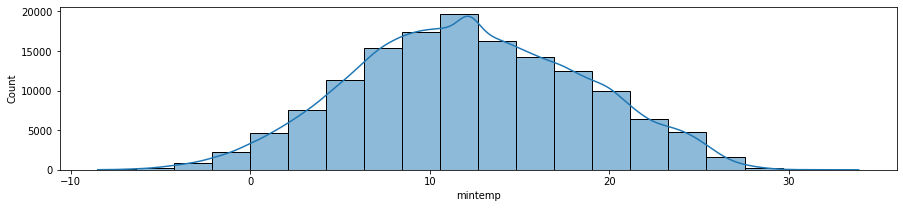

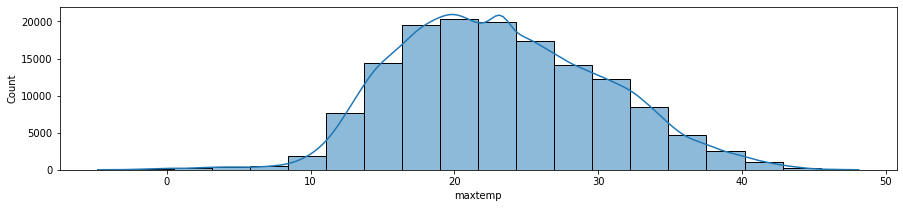

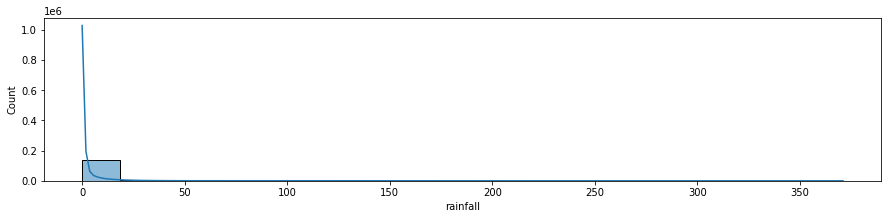

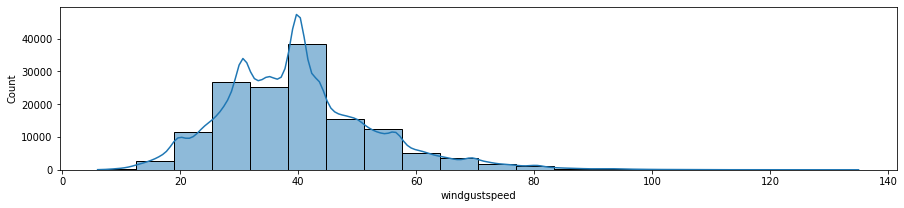

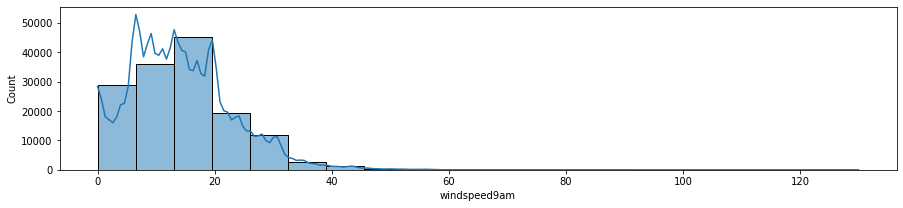

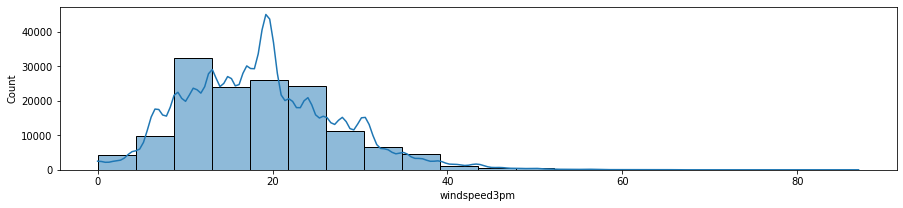

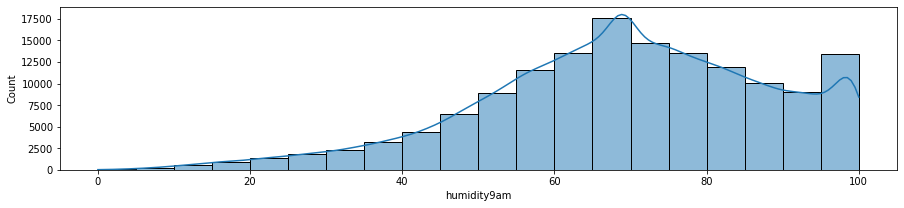

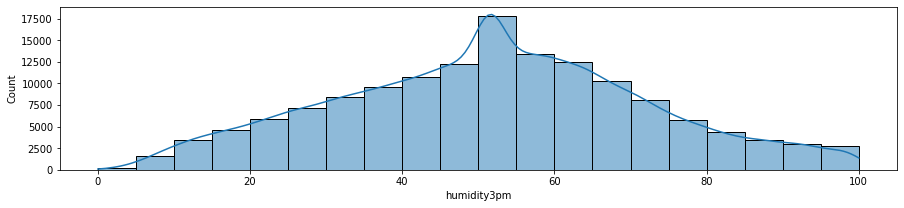

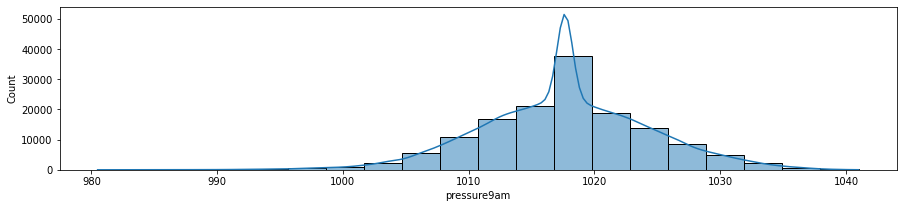

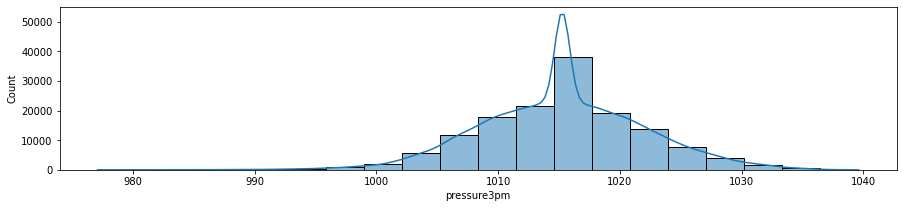

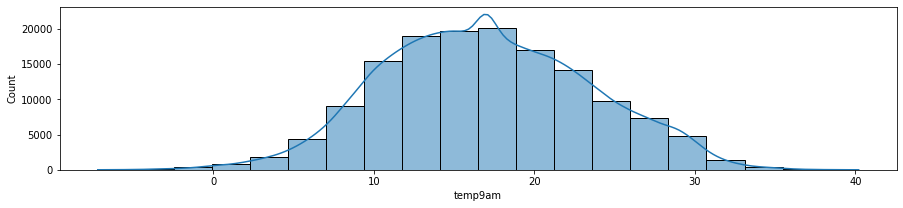

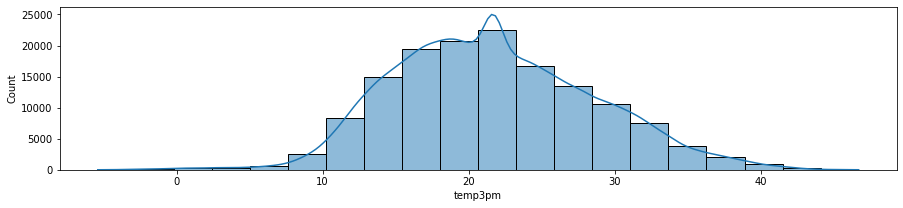

In [ ]:
#show dữ liệu 
# số lượng col kiểu số
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

for i in num_col:
   
    fig, axs = plt.subplots(1,1,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs);


['windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']


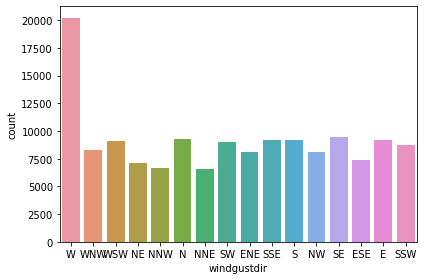

<Figure size 1440x720 with 0 Axes>

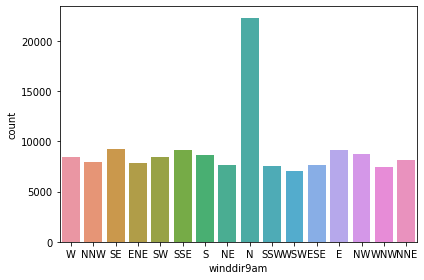

<Figure size 1440x720 with 0 Axes>

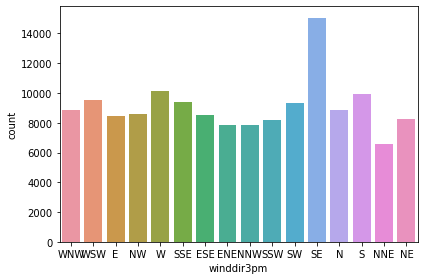

<Figure size 1440x720 with 0 Axes>

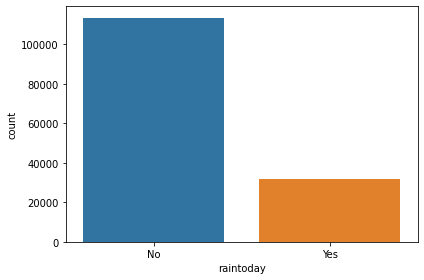

<Figure size 1440x720 with 0 Axes>

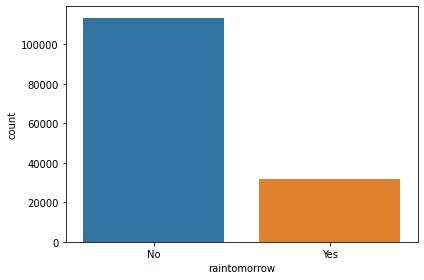

<Figure size 1440x720 with 0 Axes>

In [ ]:
#show dữ liệu 
# số lượng col kiểu obj
cat_col=df.select_dtypes(object).columns.tolist()
print(cat_col)
for i in cat_col:
    fig, ax = plt.subplots(1,1)
    plt.figure(figsize=(20,10))

    
    sns.countplot(data=df, x = i,ax = ax)
    fig.tight_layout()


In [ ]:
#label encoder obj
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [ ]:
X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_train2 = pca.fit_transform(X_train)
X_test2 = pca.fit_transform(X_test)

accuracy score:  81.90224116595628 %
Training score: 83.25%
Test score: 81.9%


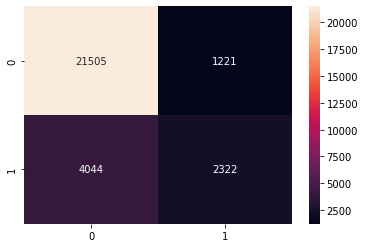

In [ ]:
# LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit model
logreg.fit(X_train2, y_train)

# Predict data
y_pred_test_logreg = logreg.predict(X_test2)

# accuracy score
print("accuracy score: ", accuracy_score(y_test, y_pred_test_logreg.round())*100, "%")
print(f'Training score: {round(logreg.score(X_train2, y_train) * 100, 2)}%')
print(f'Test score: {round(logreg.score(X_test2, y_test) * 100, 2)}%')

logreg = confusion_matrix(y_test, y_pred_test_logreg)

sns.heatmap(logreg, annot=True, fmt="d")

In [ ]:


print(classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     22726
           1       0.66      0.36      0.47      6366

    accuracy                           0.82     29092
   macro avg       0.75      0.66      0.68     29092
weighted avg       0.80      0.82      0.80     29092



In [ ]:
print(logreg)

[[21505  1221]
 [ 4044  2322]]


In [ ]:
feature_names = df.columns.drop('raintomorrow').to_list()

In [ ]:
#Tree
clf_dt = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred_dt)
print('Accuracy :',score)
print(f'Training score: {round(clf_dt.score(X_train, y_train) * 100, 2)}%')
print(f'Test score: {round(clf_dt.score(X_test, y_test) * 100, 2)}%')


Accuracy : 0.8388216691874055
Training score: 83.89%
Test score: 83.88%


In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22726
           1       0.74      0.41      0.53      6366

    accuracy                           0.84     29092
   macro avg       0.80      0.68      0.71     29092
weighted avg       0.83      0.84      0.82     29092



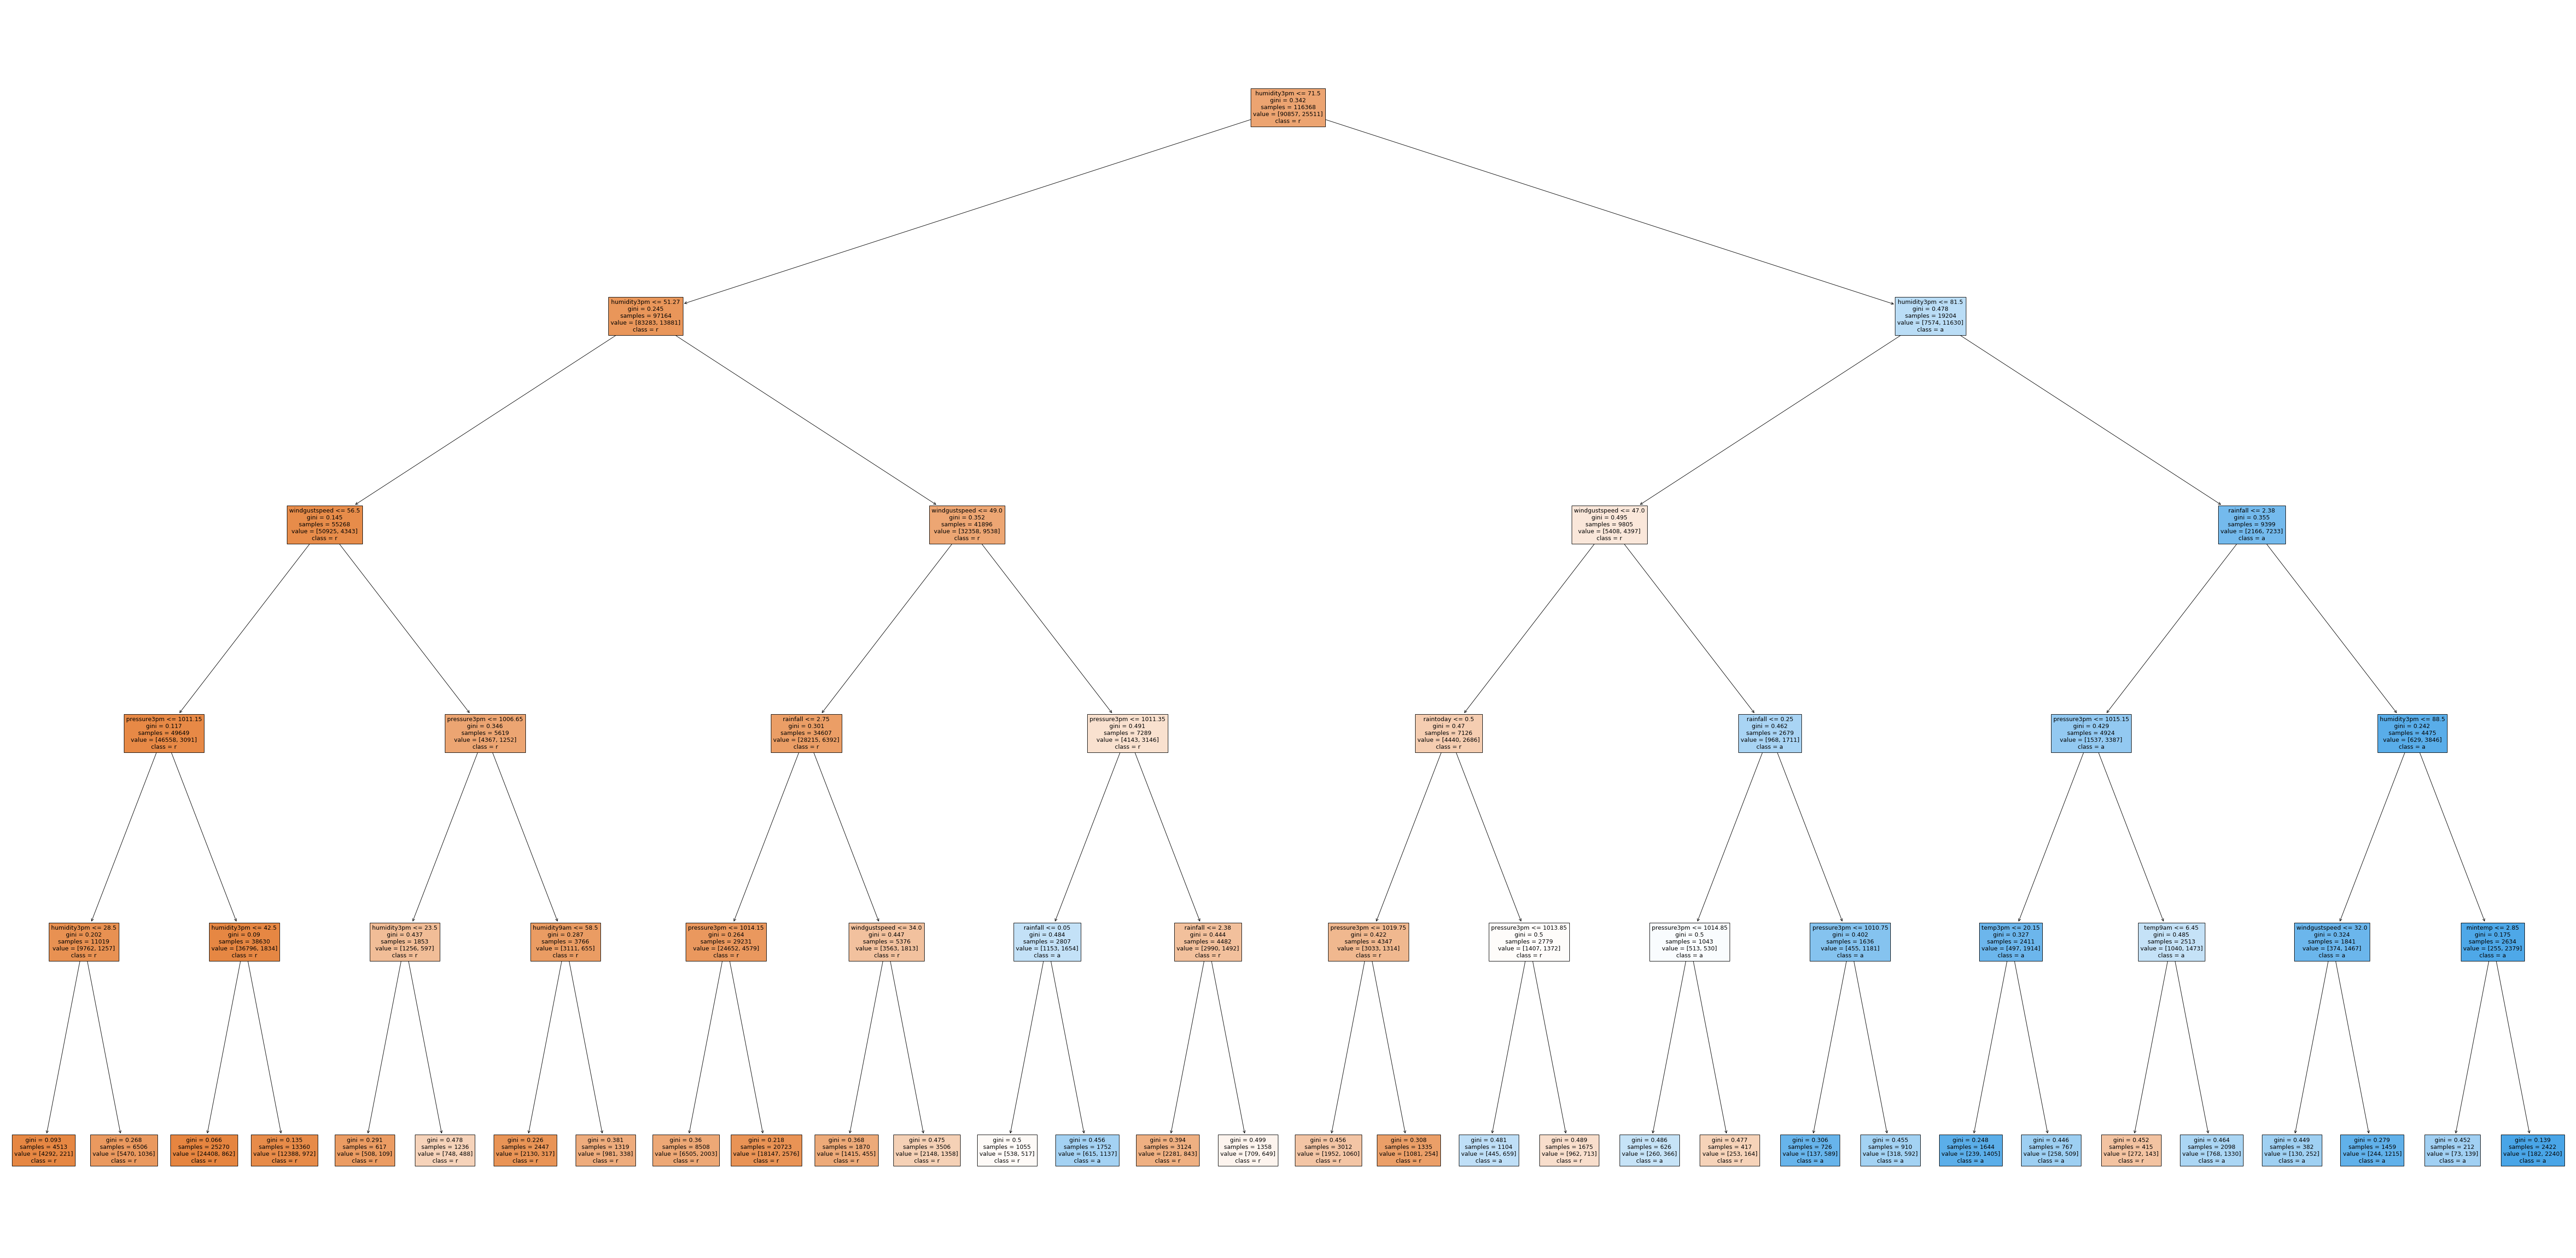

In [ ]:
plt.figure(figsize=(100,50))
plot_tree(clf_dt, feature_names=X_train.columns, class_names='raintoday', filled=True);

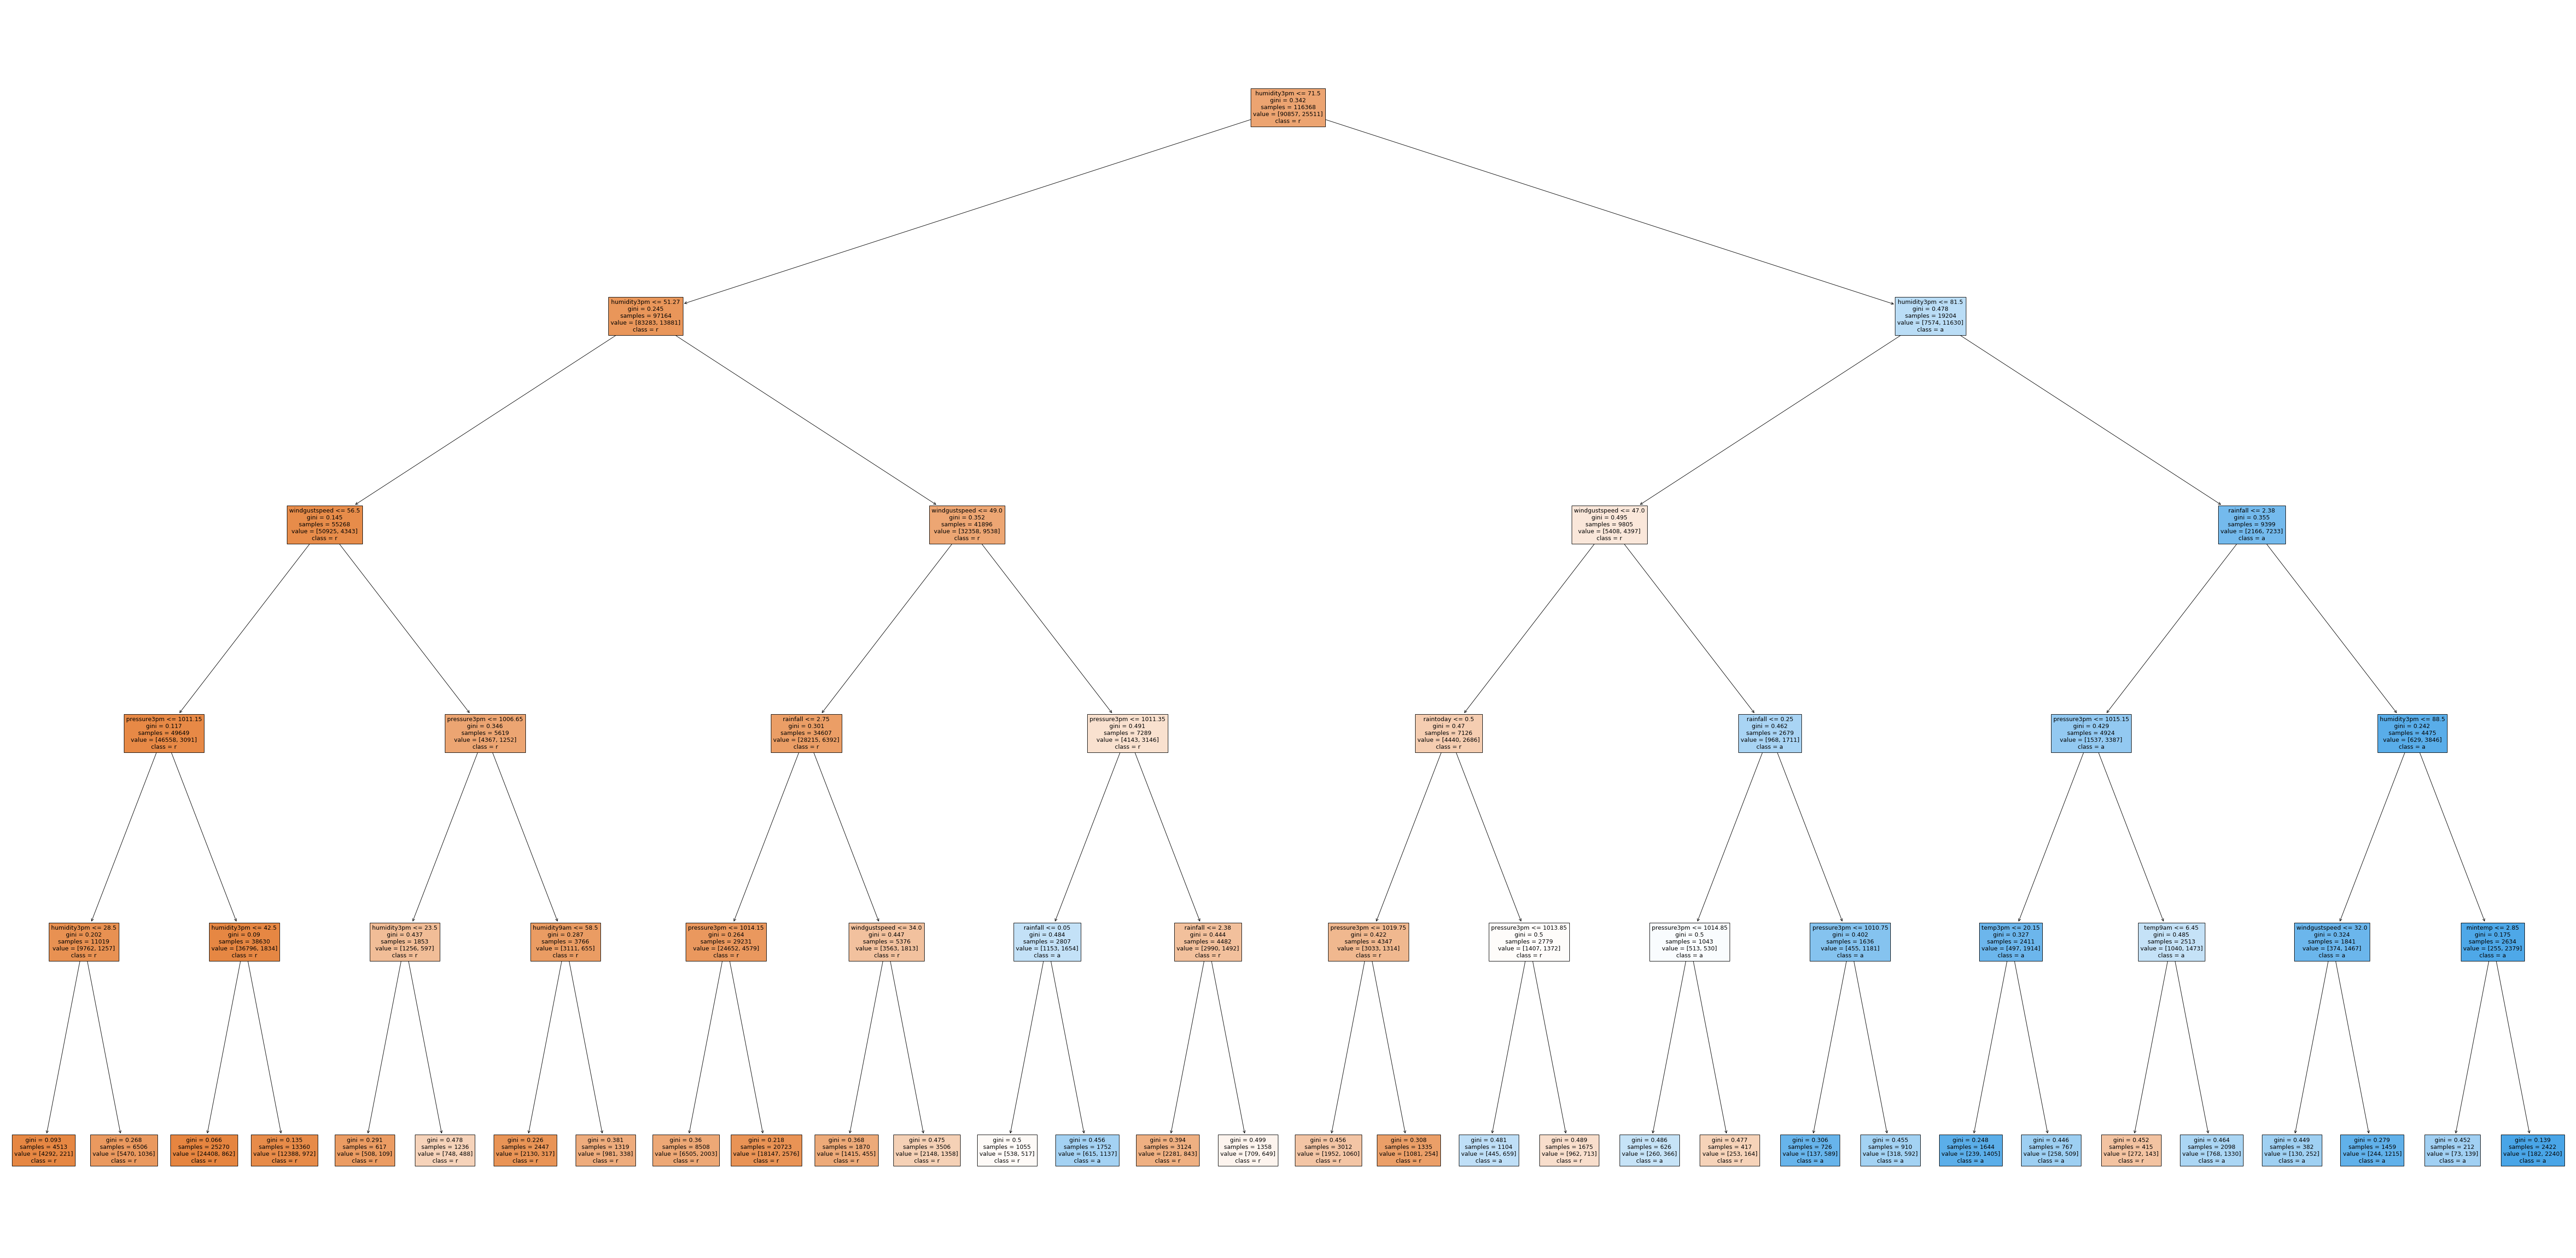

In [ ]:
text_dt = export_text(clf_dt)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(clf_dt, 
                   feature_names=feature_names,  
                   class_names='raintoday',
                   filled=True)
fig.savefig("decistion_tree.png")

In [ ]:
import graphviz
dot_data = export_graphviz(clf_dt, out_file=None, 
                                feature_names=feature_names,  
                                class_names='raintoday',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")


'decision_tree_graphivz.png'

accuracy score:  83.35281176955864 %
Training score: 83.44%
Test score: 83.35%


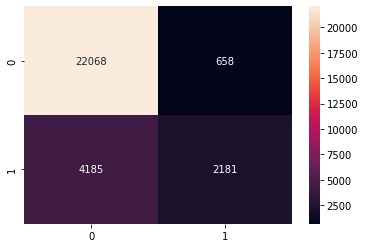

In [ ]:
# # SVM
from joblib import dump, load

model_SVC = SVC()

# Fit model
model_SVC.fit(X_train, y_train)
dump(model_SVC, 'model_SVC.joblib') 
# Predict data
y_pred_test_model_SVC = model_SVC.predict(X_test)

# accuracy score
print("accuracy score: ", accuracy_score(y_test, y_pred_test_model_SVC.round())*100, "%")
print(f'Training score: {round(model_SVC.score(X_train, y_train) * 100, 2)}%')
print(f'Test score: {round(model_SVC.score(X_test, y_test) * 100, 2)}%')

model_SVC = confusion_matrix(y_test, y_pred_test_model_SVC)
sns.heatmap(model_SVC, annot=True, fmt="d")